<H2><CENTER> Emoji Prediction<CENTER><H2>

### Importing necessary packages

In [1]:
import re# regular expression used for string manipulation
import codecs# to read other languges data
import numpy as np# NumPy is a Python library used for working with arrays
import pandas as pd#working with dataframe
import time#to calculate time of execution

In [2]:
import spacy#package to import stop list
from spacy.lang.te import STOP_WORDS as STOP_WORDS_TE
with codecs.open("C:\\Users\haris\\Downloads\\telugu_stopwords.txt", encoding='utf-8') as f:
    stop_txt_te = f.read()
stop_te = stop_txt_te.splitlines()

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential

In [48]:
from sklearn.model_selection import train_test_split#to split the data into test and train
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
#importing classifer algorithm
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

### Reading files

In [5]:
with codecs.open("C:\\Users\\haris\\Downloads\\Twitter corpus of Resource-Scarce Languages for Sentiment Analysis and Multilingual Emoji Prediction\\data\\data\\emoji_prediction_data\\telugu_data\\telugu.txt", encoding='utf-8') as f:
    txt1 = f.read()#to read the total file
print(txt1[0:1000])

24ఎస్టీయూ తెలంగాణ24 చరిత్రలో ఈ రోజు/అక్టోబర్ 24 󾔖ఐక్యరాజ్య సమితి పతాకం󾔖 󾔖ఐక్యరాజ్యసమితి దినోత్సవం󾔖 󾭺1577 :...
ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరోకి ఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు.. #ప్రభాస్
ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరో #ప్రభాస్ కిఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు
*_BE A LIGHT INTO YOURSELF_* *మనం మానసిక ప్రశాంతతను ఎలా పొందవచ్చు.* మానసిక ప్రశాంతత ఇది ఎక్కడ...
అమ్మకు ఎంత గౌరవమిస్తున్నారో భార్యకు కూడా అంతే ఇవ్వండి.. ఎందుకంటే ఒకరు *చందమామ* చూపిస్తారు.. మరొకరు *చుక్కలు* చూపిస్తారు..!!
నీ ప్రమేయం లేకుండా నిన్ను ఎవరూ నాశనం చేయలేరు, అది తెలుసుకుంటే.. నీకు ఒకర్ని నిందించే అవసరం ఎప్పుడూ రాదు; శుభోదయం..!!
పరిస్థితులెలా ఉన్నా నీ కర్తవ్యం నీకు గుర్తుంటే.. జరగాల్సిన పనులు జరుగు తుంటాయి; శుభోదయం..!!
నీకు అందని దానికోసం ఆశపడకు, నీకు నచ్చని దానికోసం కష్టపడకు, నీకై కష్టపడేవారిని మరిచిపోకు, నిన్ను ఇష్టపడేవారిని వదులు కోకు. శుభోదయం..!!
దీపావళి శుభాకాంక్షలు. మన పద్దతి ప్రకారమే అయితే దీపాలు ఆర్పకూడదు. అలా ఈసారి దీపావళి నాకు ఓరోజు ముందే వచ్సినట్టే.
krish tweet ....

In [6]:
emoji_te = (pd.read_csv("C:\\Users\\haris\\Downloads\\Twitter corpus of Resource-Scarce Languages for Sentiment Analysis and Multilingual Emoji Prediction\\data\\data\\emoji_prediction_data\\telugu_data\\telugu.csv"))
emoji_te = emoji_te["label"].tolist() 

### Cleaning Text

In [7]:
def remove_punct_te(text):
    new_words = " "
    for word in text:
        if word not in STOP_WORDS_TE or stop_te:
            w = re.sub(r'[.#-:?!\_|""'',-...A-Za-z0-9]','',word) #remove everything except words and space#how 
            new_words = new_words + w
    return re.sub(r"\s+", " ", new_words, flags=re.UNICODE)

In [8]:
start=time.time()
text_te = txt1.splitlines()
#print(remove_punct(text_cleaned[0:10000]))
filtered_sentence_te = []
for i in range(0,len(text_te)):
    filtered_sentence_te.append(remove_punct_te(text_te[i]))
print(filtered_sentence_te[0:10])
end=time.time()
tt=end-start
print("Time taken to filter the sequence :",tt,"s")

[' ఎస్టీయూ తెలంగాణ చరిత్రలో ఈ రోజుఅక్టోబర్ \U000fe516ఐక్యరాజ్య సమితి పతాకం\U000fe516 \U000fe516ఐక్యరాజ్యసమితి దినోత్సవం\U000fe516 \U000feb7a ', ' ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరోకి ఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు ప్రభాస్', ' ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరో ప్రభాస్ కిఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు', ' మనం మానసిక ప్రశాంతతను ఎలా పొందవచ్చు మానసిక ప్రశాంతత ఇది ఎక్కడ', ' అమ్మకు ఎంత గౌరవమిస్తున్నారో భార్యకు కూడా అంతే ఇవ్వండి ఎందుకంటే ఒకరు చందమామ చూపిస్తారు మరొకరు చుక్కలు చూపిస్తారు', ' నీ ప్రమేయం లేకుండా నిన్ను ఎవరూ నాశనం చేయలేరు అది తెలుసుకుంటే నీకు ఒకర్ని నిందించే అవసరం ఎప్పుడూ రాదు; శుభోదయం', ' పరిస్థితులెలా ఉన్నా నీ కర్తవ్యం నీకు గుర్తుంటే జరగాల్సిన పనులు జరుగు తుంటాయి; శుభోదయం', ' నీకు అందని దానికోసం ఆశపడకు నీకు నచ్చని దానికోసం కష్టపడకు నీకై కష్టపడేవారిని మరిచిపోకు నిన్ను ఇష్టపడేవారిని వదులు కోకు శుభోదయం', ' దీపావళి శుభాకాంక్షలు మన పద్దతి ప్రకారమే అయితే దీపాలు ఆర్పకూడదు అలా ఈసారి దీపావళి నాకు ఓరోజు ముందే వచ్సినట్టే', ' దీపావళి శుభాకాంక్షలు మన

### Text to Vector

In [9]:
#telugu
vectorizer_te = CountVectorizer()
X = vectorizer_te.fit_transform(filtered_sentence_te)
#print(X)

In [10]:
vectorizer_d = CountVectorizer()
X_d = vectorizer_d.fit_transform(filtered_sentence_te).toarray()

### Label Encoding ###

In [11]:
#telugu
le = LabelEncoder()
Y = le.fit_transform(emoji_te[0:len(filtered_sentence_te)])
la = le.inverse_transform(Y)
set(la)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19}

### Splitting data - TELUGU

In [12]:
#Splitting the data into train data and test data
X_train_te, X_test_te, y_train_te, y_test_te = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [13]:
#Splitting the data into train data and test data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d,Y, test_size = 0.2, random_state = 42)

In [14]:
y_train_d = to_categorical(y_train_d)
y_test_d = to_categorical(y_test_d)

count_classes = y_test_d.shape[1]
print(count_classes)

19


In [15]:
#Printing the size of the train data, train label, test data and test label
print("Shape train data = ",np.shape(X_train_te))
print("Shape of train label = ",np.shape(y_train_te))
print("Shape of test data = ",np.shape(X_test_te))
print("Shape of test label = ",np.shape(y_test_te))

Shape train data =  (13592, 3732)
Shape of train label =  (13592,)
Shape of test data =  (3398, 3732)
Shape of test label =  (3398,)


### Decision Tree###

In [16]:
start=time.time()
clf_dt_te = DecisionTreeClassifier()
clf_dt_te = clf_dt_te.fit(X_train_te, y_train_te)
end=time.time()
tt=end-start
print("Time taken to train the model :" ,tt,"s")

Time taken to train the model : 1.466688632965088 s


In [17]:
start=time.time()
y_pred_dt_te = clf_dt_te.predict(X_test_te)
end=time.time()
tt=end-start
print("Time taken to test the model :" ,tt,"s")

Time taken to test the model : 0.0029916763305664062 s


#### Decision Tree Classifier Report - Telugu

In [18]:
#Computation of the accuracy score
acc_dt_te = accuracy_score(y_test_te, y_pred_dt_te)
print('Accuracy = ','%.2f'%(acc_dt_te*100))

Accuracy =  52.68


In [19]:
from sklearn.metrics import classification_report
rep_dt_te = classification_report(y_test_te, y_pred_dt_te, output_dict=True)
rep1_dt_te = classification_report(y_test_te, y_pred_dt_te)

macro_precision_dt_te =  rep_dt_te['macro avg']['precision'] 
macro_recall_dt_te = rep_dt_te['macro avg']['recall']    
macro_f1_dt_te = rep_dt_te['macro avg']['f1-score']
accuracy_dt_te = rep_dt_te['accuracy']

print(rep1_dt_te)

              precision    recall  f1-score   support

           0       0.53      0.52      0.53       196
           1       0.46      0.59      0.52       570
           2       0.57      0.56      0.57       752
           3       0.62      0.56      0.59       118
           4       0.28      0.19      0.23        47
           5       0.56      0.48      0.52       375
           6       0.52      0.57      0.55       430
           7       0.75      0.67      0.71        36
           8       0.49      0.35      0.40        52
           9       0.54      0.39      0.45       145
          10       0.46      0.41      0.43        75
          11       0.62      0.55      0.58        29
          12       0.36      0.17      0.24        23
          13       0.52      0.46      0.49       155
          14       0.36      0.44      0.40         9
          15       0.50      0.49      0.49       154
          16       0.71      0.71      0.71         7
          17       1.00    

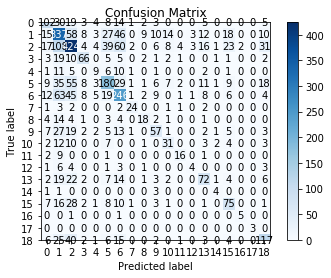

In [21]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_te, y_pred_dt_te)

[192, 735, 746, 106, 32, 322, 472, 32, 37, 106, 68, 26, 11, 139, 11, 150, 7, 3, 203]


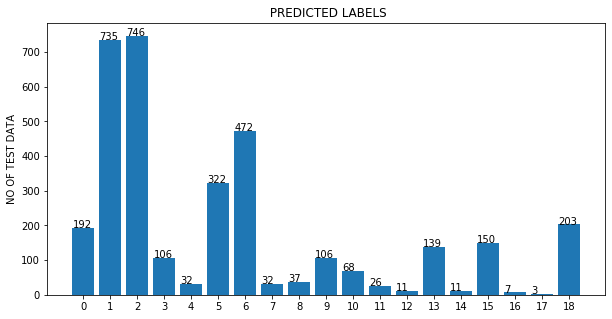

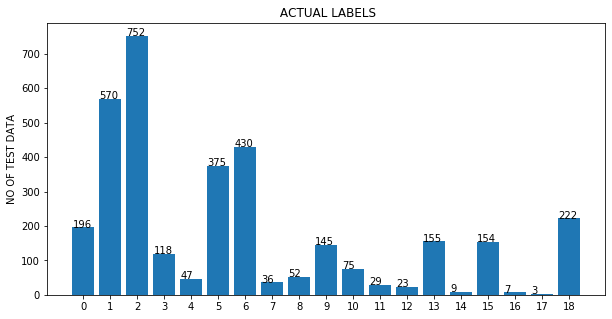

In [22]:
#ax = plt.subplot(1,2,1)
fig = plt.figure(figsize = (10, 5)) 
x = np.arange(19)
height = []
for i in range(0,19):
    height.append(len(y_pred_dt_te[y_pred_dt_te==i]))
print(height)
plt.bar(x, height = height)
plt.xticks(x, x)
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    
    plt.text(value-0.4,len(y_pred_dt_te[y_pred_dt_te==value]), str(len(y_pred_dt_te[y_pred_dt_te==value])))
fig1 = plt.figure(figsize = (10, 5)) 
height=[]
for i in range(0,19):
    height.append(len(y_test_te[y_test_te==i]))
plt.bar(x, height = height)
plt.xticks(x, x)
plt.title(" ACTUAL LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    plt.text(value-0.4,len(y_test_te[y_test_te==value]) , str(len(y_test_te[y_test_te==value])))

In [23]:
r = "షట్చక్రాలు మానవుని శరీరం లోని వెన్నుపూసలో ఉండే , దిగువ చెప్పిన ఆరు సూక్ష్మ స్థానాలను షట్చక్రాలు అంటారు* అష్ట భార్యలు* శ్రీకృష్ణుడి ఎనిమిది మంది భార్యలును అష్ట భార్యలు లేదా అష్టమహిషులు 1.రుక్మిణి,2. సత్యభామ,3. జాంబవతి,4. మిత్రవింద,5.భద్ర"
rv = vectorizer_te.transform([remove_punct_te(r)])

In [24]:
print(clf_dt_te.predict(rv))

[7]


### GUI ###

In [49]:
import PIL.Image,PIL.ImageTk
def predict():
    ans = remove_punct_te(str(textArea.get("1.0","end")))
    X1 = vectorizer_te.transform([ans])
    pred = clf_dt_te.predict(X1)
                    
    if(pred==0):
        Label(gui, text ="The predicted Tweet is of Class 0").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class1.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==1):
        Label(gui, text ="The predicted Tweet is of Class 1").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class2.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==2):
        Label(gui, text ="The predicted Tweet is of Class 2").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class3.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==3):
        Label(gui, text ="The predicted Tweet is of Class 3").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class4.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==4):
        Label(gui, text ="The predicted Tweet is of Class 4").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class5.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==5):
        Label(gui, text ="The predicted Tweet is Class 5").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class6.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=350)
        Button.pack()
    if(pred==6):
        Label(gui, text ="The predicted Tweet is of Class 6").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class7.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==7):
        Label(gui, text ="The predicted Tweet is of Class 7").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class8.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==8):
        Label(gui, text ="The predicted Tweet is Class 8").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class9.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==9):
        Label(gui, text ="The predicted Tweet is of Class 9").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class10.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=350)
        Button.pack()
    if(pred==10):
        Label(gui, text ="The predicted Tweet is Class 10").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class11.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==11):
        Label(gui, text ="The predicted Tweet is of Class 11").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class12.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=350)
        Button.pack()
    if(pred==12):
        Label(gui, text ="The predicted Tweet is of Class 12").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class13.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==13):
        Label(gui, text ="The predicted Tweet is of Class 13").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class14.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=350)
        Button.pack()
    if(pred==14):
        Label(gui, text ="The predicted Tweet is of Class 14").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class15.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==15):
        Label(gui, text ="The predicted Tweet is of Class 15").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class16.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==16):
        Label(gui, text ="The predicted Tweet is of Class 16").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class17.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==17):
        Label(gui, text ="The predicted Tweet is of Class 17").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class18.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()
    if(pred==18):
        Label(gui, text ="The predicted Tweet is of Class 18").place(x=120,y=200)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\class19.png") 
        photoimage0 = photo0.subsample(1, 1) 
        Button(gui, image = photoimage0).place(x=150,y=250)
        Button.pack()

In [50]:
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk)
import tkinter as tk
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import *
from matplotlib.figure import Figure 
gui = Tk()
gui.title("Emoji Prediction - Report")
gui.geometry('500x400') 
gui.configure(bg='steel blue')
Label(gui, text = "Enter Tweets : ").place(x=20,y=160)
textArea = Text(gui, height = 2, width = 25, font = "cambria 13")
textArea.place(x=100,y=150)
run_button = Button(gui,  command = predict, text = "predict")
run_button.pack() 
run_button.place(x=340,y=155)
label = Label(gui)
label.pack()
mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\haris\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-49-7d38bcdc2699>", line 54, in predict
    Button.pack()
TypeError: pack_configure() missing 1 required positional argument: 'self'


### Deep learning Model ###

In [36]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = X_train_te.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(19, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
start=time.time()
model.fit(X_train_d, y_train_d, epochs = 20)
end=time.time()
tt=end-start
print("Time taken to train the sequence :")
print(tt,"secs")

Train on 13592 samples
Epoch 1/20
13592/13592 [==============================] - 4s 260us/sample - loss: 2.3023 - accuracy: 0.2682
Epoch 2/20
13592/13592 [==============================] - 3s 239us/sample - loss: 1.8279 - accuracy: 0.4206
Epoch 3/20
13592/13592 [==============================] - 3s 240us/sample - loss: 1.2354 - accuracy: 0.6218
Epoch 4/20
13592/13592 [==============================] - 3s 243us/sample - loss: 0.7622 - accuracy: 0.7769
Epoch 5/20
13592/13592 [==============================] - 3s 242us/sample - loss: 0.5066 - accuracy: 0.8555
Epoch 6/20
13592/13592 [==============================] - 3s 242us/sample - loss: 0.3838 - accuracy: 0.8940
Epoch 7/20
13592/13592 [==============================] - 3s 243us/sample - loss: 0.3149 - accuracy: 0.9128
Epoch 8/20
13592/13592 [==============================] - 3s 244us/sample - loss: 0.2853 - accuracy: 0.9214
Epoch 9/20
13592/13592 [==============================] - 3s 245us/sample - loss: 0.2520 - accuracy: 0.9291
Epoch

In [38]:
pred_train= model.predict(X_train_d)
scores = model.evaluate(X_train_d, y_train_d, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test_d)
scores2 = model.evaluate(X_test_d, y_test_d, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

Accuracy on training data: 0.9497498273849487 
 Error on training data: 0.05025017261505127
Accuracy on test data: 0.5379635095596313 
 Error on test data: 0.46203649044036865


In [39]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [40]:
from tensorflow.keras.models import model_from_json

In [41]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_d,y_test_d,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 95.46%


In [42]:
l = "దొంగల స్థావరాలు ఎవరికి తెలియకూడదని దొంగలు జాగ్రత్తపడతారు,సమయం ఆసన్నమైంది నువ్వు నిప్పువో లేదా కంపువో నిరూపించుకో గజదొంగ …"
l1 = vectorizer_d.transform([remove_punct_te(r)]).toarray()

In [43]:
l1.shape

(1, 3732)

In [44]:
print(np.argmax(loaded_model.predict(l1)))

7
